In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Summary = pd.read_excel('Desktop/Projects/RAYSE ACADEMY/Untitled Folder/CCU01C/Khan Academy Report -- 02-17-1970 to 02-28-2018.xlsx',
                        sheetname='Summary')
Mis_Spec = pd.read_excel('Desktop/Projects/RAYSE ACADEMY/Untitled Folder/CCU01C/Khan Academy Report -- 02-17-1970 to 02-28-2018.xlsx',
                         sheetname='Mission-specific')
Exercises = pd.read_excel('Desktop/Projects/RAYSE ACADEMY/Untitled Folder/CCU01C/Khan Academy Report -- 02-17-1970 to 02-28-2018.xlsx',
                        sheetname='Exercises')
Videos = pd.read_excel('Desktop/Projects/RAYSE ACADEMY/Untitled Folder/CCU01C/Khan Academy Report -- 02-17-1970 to 02-28-2018.xlsx',
                        sheetname='Videos')
Points = pd.read_excel('Desktop/Projects/RAYSE ACADEMY/Untitled Folder/CCU01C/Khan Academy Report -- 02-17-1970 to 02-28-2018.xlsx',
                        sheetname='Points')
Badges = pd.read_excel('Desktop/Projects/RAYSE ACADEMY/Untitled Folder/CCU01C/Khan Academy Report -- 02-17-1970 to 02-28-2018.xlsx',
                        sheetname='Badges')
Skills = pd.read_excel('Desktop/Projects/RAYSE ACADEMY/Untitled Folder/CCU01C/Khan Academy Report Skill Progress.xlsx')



In [229]:

####Filter for  only the exercises that are part of the 3rd grade mission 
grade3_ex=  Exercises[Exercises.Exercise.isin(Skills.Exercise)]

#what is the one exercise in the 3rd grade mission that no student has yet attempted?

print ('the number of exerises/skills in the 3rd grade mission is ' +  str(len(Skills)))

zz = len(grade3_ex['Exercise'].unique())

print ('the number of 3rd grade mission skills attempted by at least one student is  ' +  str(zz))


qq = Skills[~Skills.Exercise.isin(grade3_ex.Exercise)]





the number of exerises/skills in the 3rd grade mission is 115
the number of 3rd grade mission skills attempted by at least one student is  114


In [230]:
qq.Exercise

77    Telling time on the number line
Name: Exercise, dtype: object

In [231]:
######## Create a total minutes spent(total_Time_on_Mis) on Mission Collumn

ccu01c = Mis_Spec

m = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').sum()

m.reset_index(inplace=True) 

ccu01c = pd.merge(ccu01c, m,how='left', on='Student')


ccu01c.rename(columns={'Time Spent (min)': 'Total_Time_on_Mis'}, inplace=True)


In [232]:
ccu01c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 8 columns):
Student              28 non-null object
Struggling           28 non-null int64
Needs Practice       28 non-null int64
Practiced            28 non-null int64
Level 1              28 non-null int64
Level 2              28 non-null int64
Mastered             28 non-null int64
Total_Time_on_Mis    23 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 2.0+ KB


In [233]:
#####Creating a totalHours spent on Mission Collumn
def myHours (x):
    q = x/60
    return q

hold= ccu01c['Total_Time_on_Mis'].apply(myHours)

hold.rename("Total_Hrs_on_Mis",inplace=True)
ccu01c = pd.concat([ccu01c,hold], axis =1)



In [234]:
ccu01c["Total_Hrs_on_Mis"].describe()

count    23.000000
mean     15.401824
std      12.696568
min       0.761389
25%       3.591944
50%      11.398056
75%      26.805833
max      39.558611
Name: Total_Hrs_on_Mis, dtype: float64

In [235]:
#####Creating a totalWeeks spent on Mission Collumn
def myWeeks (x):
    q = x/3
    return q

mold= ccu01c['Total_Hrs_on_Mis'].apply(myWeeks)

mold.rename("Total_Wks_on_Mis",inplace=True)
ccu01c = pd.concat([ccu01c,mold], axis =1)

ccu01c["Total_Wks_on_Mis"].describe()

count    23.000000
mean      5.133941
std       4.232189
min       0.253796
25%       1.197315
50%       3.799352
75%       8.935278
max      13.186204
Name: Total_Wks_on_Mis, dtype: float64

In [236]:

########### Time Spent on Exercises

##### Overall Numbers for Time Spent on mission exercises

grade3_ex['Time Spent (min)'].describe()






count    1732.000000
mean       12.271661
std        23.050311
min         0.000000
25%         1.145833
50%         4.250000
75%        14.016667
max       368.283333
Name: Time Spent (min), dtype: float64

In [237]:
### Time spent by Student per exercise

i = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').max()
w = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').min()
e = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').mean()
r = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').median()

i.reset_index(inplace=True) 
w.reset_index(inplace=True) 
e.reset_index(inplace=True) 
r.reset_index(inplace=True) 


i.rename(columns={'Time Spent (min)': 'Ex.time.max'}, inplace=True)
w.rename(columns={'Time Spent (min)': 'Ex.time.min'}, inplace=True)
e.rename(columns={'Time Spent (min)': 'ex.time.avg'}, inplace=True)
r.rename(columns={'Time Spent (min)': 'ex.time.median'}, inplace=True)

ccu01c = pd.merge(ccu01c, i,how='left', on='Student')
ccu01c = pd.merge(ccu01c, w,how='left', on='Student')
ccu01c = pd.merge(ccu01c, e,how='left', on='Student')
ccu01c = pd.merge(ccu01c, r,how='left', on='Student')

In [238]:
##### Summarize time spent per  Excercise




In [239]:
##### Create a progress collumn

nSkills = len(Skills)

def prog(a,b,c,d,e):
    mastered = a *4
    level2 = b *3
    level1 = c * 1
    practiced = d*1
    per = (mastered+level2+level1+practiced)/(4*e)
    return per

c = prog(Mis_Spec.Mastered,Mis_Spec['Level 2'],Mis_Spec['Level 1'],Mis_Spec.Practiced,nSkills)

ccu01c = pd.concat([ccu01c,c], axis =1)


In [240]:

ccu01c.rename(columns={0: 'Progress'}, inplace=True)

In [241]:
ccu01c.head()

,Student,Struggling,Needs Practice,Practiced,Level 1,Level 2,Mastered,Total_Time_on_Mis,Total_Hrs_on_Mis,Total_Wks_on_Mis,Ex.time.max,Ex.time.min,ex.time.avg,ex.time.median,Progress
0,ccu01s122,2,2,3,1,0,33,93.066667,1.551111,0.517037,12.266667,0.0,2.269919,0.850000,0.295652
1,ccu01s123,3,14,0,0,0,48,215.783333,3.596389,1.198796,28.333333,0.0,3.319744,1.516667,0.417391
2,ccu01s124,0,0,0,0,0,104,1614.633333,26.910556,8.970185,110.016667,0.0,15.525321,5.033333,0.904348
3,ccu01s125,12,3,0,1,0,96,2140.550000,35.675833,11.891944,135.750000,0.0,19.112054,7.558333,0.836957
4,ccu01s126,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
###################### Find the exercise students struggle with the most




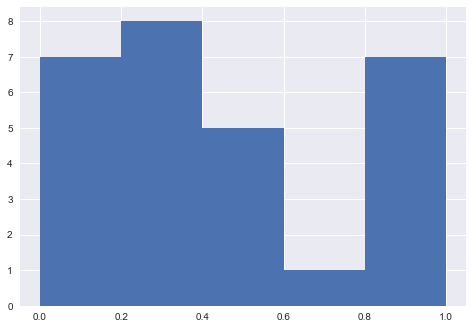

In [242]:

######################################################  Graphs  ###################################################### 
bin_values = np.arange(start=-0.2, stop=1.2, step=0.2)
ccu01c['Progress'].hist(bins=[0,0.2,0.4,0.6,0.8,1.0])








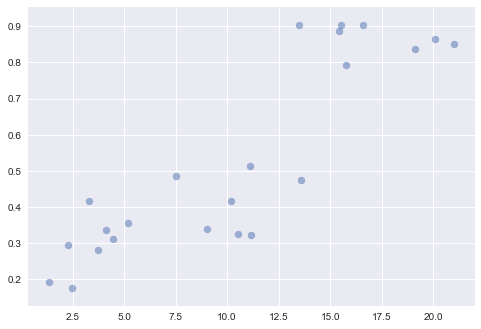

In [245]:
plt.scatter(ccu01c['ex.time.avg'],ccu01c['Progress'], alpha=0.5)

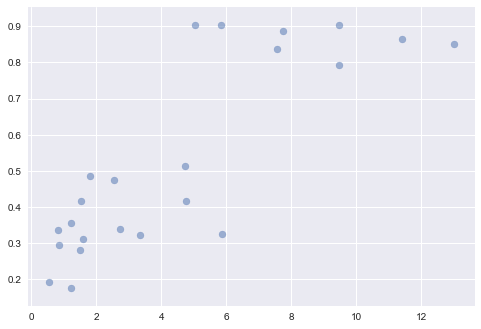

In [246]:
plt.scatter(ccu01c['ex.time.median'],ccu01c['Progress'], alpha=0.5)



In [111]:
######### breakdown of  current status



In [ ]:
########################  Time Series 

##### Time series of Student participation per day

grade3x['Last Done'] = pd.to_datetime(grade3x['Last Done'])




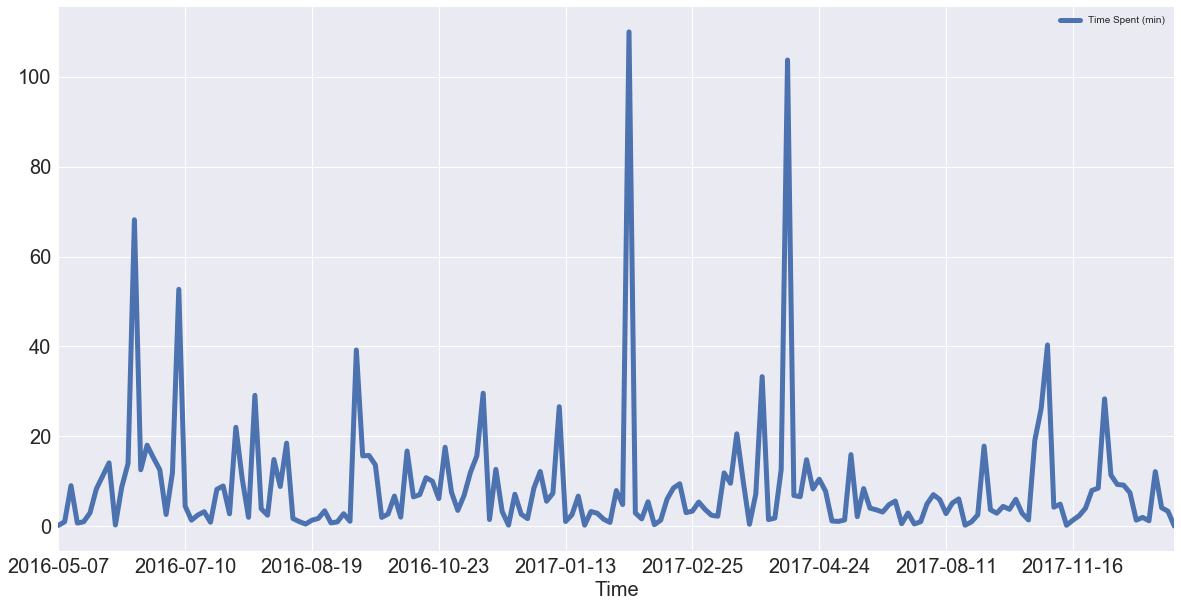

In [249]:
###### Time series of median time spent on KA per day

killers = grade3_ex[['Last Done','Time Spent (min)']].groupby(by='Last Done').median()
    
killers.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)